In [1]:
import torch
from rdkit import Chem
import pandas as pd
from metrics import get_total_metrics
from graphics import get_heatmap, get_differential_heatmap, get_pairs_heatmap, get_combined_mean_variance_heatmap

# Metrics calculating

In [14]:
drug_target_data = pd.read_csv('../analysis/bindingdb_ki_d_t_aff_smiles_split.csv')

In [15]:
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']

In [16]:
test_data_cleaned = test_data[~test_data['smiles'].apply(Chem.MolFromSmiles).isna()]

In [17]:
pred_DTI_best_vary_all = torch.load('../analysis/DTI_BDB_best_vary_all_2904')
pred_DTI_best_vary_all_wTL = torch.load('../analysis/DTI_BDB_best_tl_2904')

In [18]:
test_data_cleaned.insert(4, 'predicted', pred_DTI_best_vary_all_wTL)
test_data_cleaned

,drug,smiles,target,affinity,predicted
62902,"Cocaine::Cocaine (-)::methyl (1R,2R,3S,5S)-3-(...",COC(=O)[C@@H]1[C@H]2CC[C@@H](C[C@@H]1OC(=O)c1c...,504,5.952725,6.411373
62903,"US9062078, 162::US9475819, 162::US9637496, 162...",CCOc1ccnc(Cl)c1C(=O)N1C2CCC1C(COc1ccccn1)C2,77,5.000000,5.114037
62904,(1E)-5-methoxy-1-[4-(trifluoromethyl)phenyl]pe...,COCCCC\C(=N/OCCN)c1ccc(cc1)C(F)(F)F,504,5.845576,5.745947
62905,5-(2-(4-(benzo[d]isothiazol-3-yl)piperazin-1-y...,Clc1cc2NC(=O)Cc2cc1CCN1CCN(CC1)c1nsc2ccccc12,275,9.552842,9.435935
62906,"US9090618, H30b(ii)::US9598411, Ref. No. H30b(ii)",OC(=O)CN1CCC[C@@H]1c1nc2ccccc2n1[C@@H]1C[C@@H]...,379,8.045757,7.258320
...,...,...,...,...,...
78623,"US9079866, 302::US9745328, Compound 302::US988...",Nc1ncc(cn1)-c1ccc(cc1F)-c1ccccc1S(N)(=O)=O,517,5.602060,5.904510
78624,2-aminobenzene-1-sulfonamide::CHEMBL6705::US10...,Nc1ccccc1S(N)(=O)=O,536,5.204815,5.593411
78625,CHEMBL2016866,NC(=N)c1ccc(CNC(=O)[C@@H]2CCC(=O)NCc3cccc(CNC(...,106,5.464706,5.219472
78626,"US8604061, 260",NC1=NC(CO1)c1cc(Cl)ccc1Cl,397,8.886057,9.192204


In [19]:
test_data_cleaned.to_csv('../analysis/DTI_BDB_best_TL_2904_preds.csv', index=False)

In [20]:
results = get_total_metrics(test_data_cleaned, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

100%|██████████| 25/25 [00:00<00:00, 105490.54it/s]
0it [00:00, ?it/s]
100%|██████████| 60/60 [00:00<00:00, 61500.06it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 87930.90it/s]
0it [00:00, ?it/s]
100%|██████████| 67/67 [00:00<00:00, 57751.41it/s]
0it [00:00, ?it/s]
100%|██████████| 13/13 [00:00<00:00, 94172.63it/s]
0it [00:00, ?it/s]
100%|██████████| 111/111 [00:00<00:00, 37765.07it/s]
0it [00:00, ?it/s]
100%|██████████| 65/65 [00:00<00:00, 55958.49it/s]
0it [00:00, ?it/s]
100%|██████████| 95/95 [00:00<00:00, 38625.33it/s]
0it [00:00, ?it/s]
100%|██████████| 14/14 [00:00<00:00, 116277.73it/s]
0it [00:00, ?it/s]
100%|██████████| 72/72 [00:00<00:00, 32143.68it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 26924.92it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:00<00:00, 96559.52it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 20661.60it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 107240.73it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
10

In [21]:
results

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,884727,0.762899,0.726720,-4.798646e+01,0.809444
1,0.0,0.1,883706,0.762774,0.726532,-4.798660e+01,0.809287
2,0.0,0.3,665931,0.766094,0.714606,-4.966048e+01,0.802594
3,0.0,0.5,216699,0.825698,0.629609,-8.519684e+00,0.781986
4,0.0,0.7,97203,0.852486,0.593243,-4.117476e+01,0.754116
5,0.0,0.9,18167,0.749135,0.729019,-2.021464e+02,0.730644
6,1.0,0.0,497800,0.755003,0.789816,-8.693463e+01,0.918718
7,1.0,0.1,497034,0.754783,0.789713,-8.693481e+01,0.918542
8,1.0,0.3,358143,0.752934,0.787592,-9.144321e+01,0.917271
9,1.0,0.5,91837,0.791245,0.750098,-7.200765e+00,0.905164


In [22]:
results.to_csv('../analysis/DTI_BDB_best_TL_2904_metrics.csv', index=False)

# Heatmaps

In [23]:
results_DTI_BDB_best_vary_all = pd.read_csv('../analysis/DTI_BDB_best_vary_all_2904_metrics.csv')

In [24]:
results_DTI_BDB_best_TL = pd.read_csv('../analysis/DTI_BDB_best_TL_2904_metrics.csv')

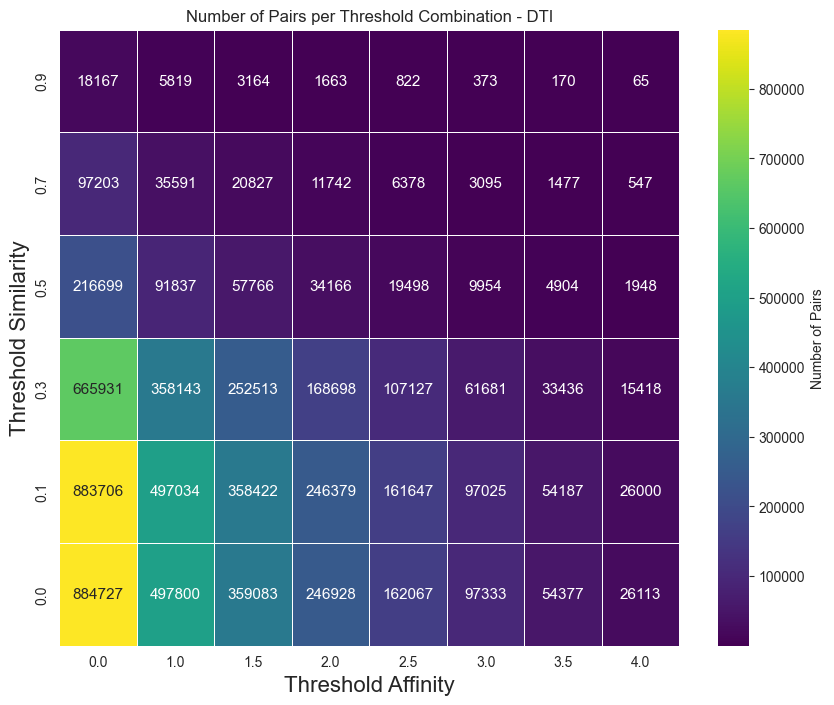

In [26]:
get_pairs_heatmap(results_DTI_BDB_best_vary_all, 'DTI')

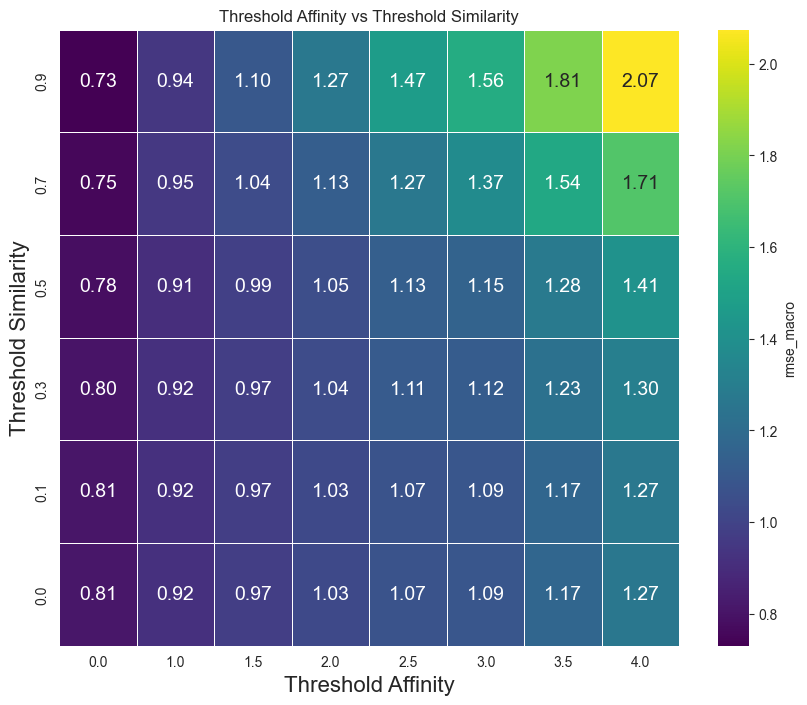

In [33]:
get_heatmap(results_DTI_BDB_best_TL, 'rmse_macro', model_name='DTI_BDB_best_TL')